In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re
import string
import nltk

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')
train_original=train.copy()

Overview of Dataset
Train -> We have 3 attributes present in our dataset and a total of 31962 labeled tweets.

ID
Label
Tweets

Test -> We have 2 attributes present in our dataset and a total of 17197 labeled tweets.

ID
Tweets

In [6]:
train_original.head(1)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [7]:
test = pd.read_csv('test.csv')
test_original=test.copy()

In [8]:
test_original.head(1)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...


Combine

Pandas dataframe.append() function is used to append rows of other dataframe to the end of the given dataframe, returning a new dataframe object.

In [9]:
combine = train.append(test,ignore_index=True,sort=True)

In [10]:
combine.head(1)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...


In [11]:
combine.tail(1)

,id,label,tweet
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


Pattern Function

In [12]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

Removing Twitter Handles

Here NumPy Vectorization ‘np.vectorize()’ is used because it is much more faster than the conventional for loops when working on datasets of medium to large sizes.

In [13]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing Punctuation, Numbers And Special Characters

Here 'str.replace()' is used to convert the punctuation, number and special characters with white space.

In [14]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
combine.head()

<ipython-input-14-39fac048886d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


Removing Stop Words

Here 'lambda'(The expression is evaluated and returned) and 'join()' is used to string from evaluated object.

In [15]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens. We tokenize our tweets because we will apply Stemming in the next step.

In [16]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

Stemming

Stemming is a process of stripping the suffixes from a tokenized tweet.

In [17]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [18]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

Combining Back To Tweet

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [20]:
combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


Word Cloud

In [21]:
!pip install WordCloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

Separating Words

In [22]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

In [23]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

Making Mask

In [24]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

Plot Word Cloud Positive Word

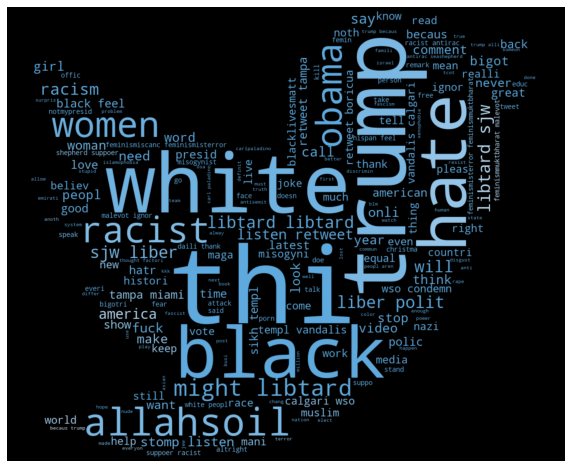

In [25]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

Extract Hashtags


In [26]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

Positive Hashtags

In [27]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])   

In [28]:
ht_positive_unnest = sum(ht_positive,[])

Negative Hashtags

In [29]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [30]:
ht_negative_unnest = sum(ht_negative,[])

Barplot

In [31]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [32]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

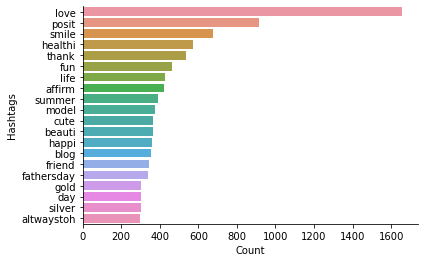

In [33]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [34]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [35]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

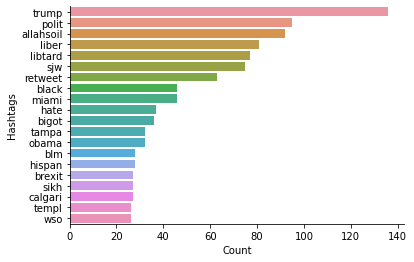

In [36]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

Extracting Features from cleaned Tweets

Bag Of Word

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. This way of training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach. So,let’s apply this word embedding technique to our available dataset. We have a package called CountVectorizer to perform this task.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF

TF-IDF stands for Term Frequency-Inverse Document Frequency, and the TF-IDF weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

The first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document.
The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.
TF-IDF = TF * IDF

We have a package available for this in Scikit-Learn known as TfidfVectorizer.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


fSplitting our dataset into Training and Validation Set


In [39]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
from sklearn.model_selection import train_test_split

Bag Of Word Split

In [42]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=41)

TF-IDF Split


In [43]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=41)

Applying ML Models
1. Supervised Machine Learning
Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

Supervised learning problems can be further grouped into regression and classification problems.

Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.

Regression: A regression problem is when the output variable is a real value, such as “dollars” or “weight”. Some common types of problems built on top of classification and regression include recommendation and time series prediction respectively.

Some popular examples of supervised machine learning algorithms are:

Linear regression for regression problems.

Random forest for classification and regression problems.

Support vector machines for classification problems.

2. Unsupervised Machine Learning
Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.

Association: An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y. Some popular examples of unsupervised learning algorithms are:

k-means for clustering problems.

Apriori algorithm for association rule learning problems.

Logistic Regression

In [44]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=41,solver='lbfgs')

Bag-of-Words Features
Fitting the Logistic Regression Model.

In [45]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=41)

Predicting the probabilities

In [46]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[8.03877888e-01, 1.96122112e-01],
       [9.94036645e-01, 5.96335534e-03],
       [9.86475450e-01, 1.35245500e-02],
       ...,
       [9.81164586e-01, 1.88354139e-02],
       [9.99395116e-01, 6.04884313e-04],
       [9.81920565e-01, 1.80794349e-02]])

In [47]:
prediction_int = prediction_bow[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

Calculating the Accuracy

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_bow,prediction_int))
print(accuracy_score(y_valid_bow,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8903
           1       0.64      0.47      0.54       686

    accuracy                           0.94      9589
   macro avg       0.80      0.72      0.75      9589
weighted avg       0.94      0.94      0.94      9589

0.9427468974867035


TF-IDF Features
Fitting the Logistic Regression Model.



In [49]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=41)

Predicting the probabilities.

In [50]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.84836347, 0.15163653],
       [0.97992739, 0.02007261],
       [0.96882466, 0.03117534],
       ...,
       [0.96685381, 0.03314619],
       [0.99488455, 0.00511545],
       [0.99063123, 0.00936877]])

In [51]:
prediction_int = prediction_tfidf[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

Calculating the Accuracy

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_tfidf,prediction_int))
print(accuracy_score(y_valid_tfidf,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8903
           1       0.68      0.45      0.54       686

    accuracy                           0.95      9589
   macro avg       0.82      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589

0.9455626238398165


Decision Trees

In [53]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=41)

Bag-of-Words Features
Fitting the Decision Tree model.

In [54]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=41)

Predicting the probabilities.

In [55]:
dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.95652174, 0.04347826],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [56]:
dct_bow=dct_bow[:,1]>=0.3
dct_int_bow=dct_bow.astype(np.int)
dct_int_bow

array([0, 0, 0, ..., 0, 0, 0])

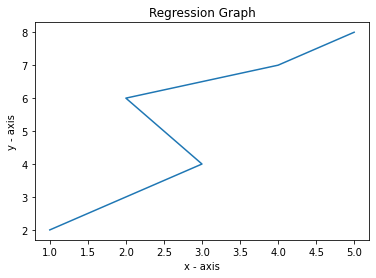

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
x =[1,3,2,4,5]
y =[2,4,6,7,8] 
# plotting the points  
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('x - axis')
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Regression Graph') 
# function to show the plot 
plt.show()

In [58]:
ct = len(x)
sum_x = 0
sum_y = 0
for i in x:
    sum_x = sum_x + i
x_mean = sum_x / ct
print('Value of X mean', x_mean)
for i in y:
    sum_y = sum_y + i
y_mean = sum_y / ct
print('value of Y mean', y_mean)
m = 2.5
c = y_mean - m * x_mean
print('Intercept', c)
r1 = 1-(2.5 * 1-2.0)
r2 = 2-(2.5 * 2-2.0)
r3 = 3-(2.5 * 2-2.0)
r4 = 6-(2.5 * 3-2.0)
residuals =[0.5, -1, 0, .5]
N = 4
rmse = math.sqrt((r1*2 + r22 + r32 + r4*2)/N)
print('Root Mean square error using maths', rmse)

Value of X mean 3.0
value of Y mean 5.4
Intercept -2.0999999999999996


NameError: name 'r22' is not defined

In [59]:
from sklearn.metrics import mean_squared_error 
y =[1, 2, 3, 6]
y_pred =[0.5, 3, 3, 5.5]
mse = math.sqrt(mean_squared_error(y, y_pred))
print('Root mean square error', mse)

Root mean square error 0.6123724356957945
